# Predicting Potential Bankrupcy of a Company using Keras and Scikit Learn

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

**Source**

Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

**Relevant Papers**

Liang, D., Lu, C.-C., Tsai, C.-F., and Shih, G.-A. (2016) Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study. European Journal of Operational Research, vol. 252, no. 2, pp. 561-572.
https://www.sciencedirect.com/science/article/pii/S0377221716000412

## Importing the Libraries and Loading Datasets

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [43]:
df=pd.read_csv("data-bankrupcy.csv.csv")

In [60]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Main Information about the Dataset
Y - Bankrupt?: Class label

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [64]:
df[" Net Income Flag"].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

<AxesSubplot:>

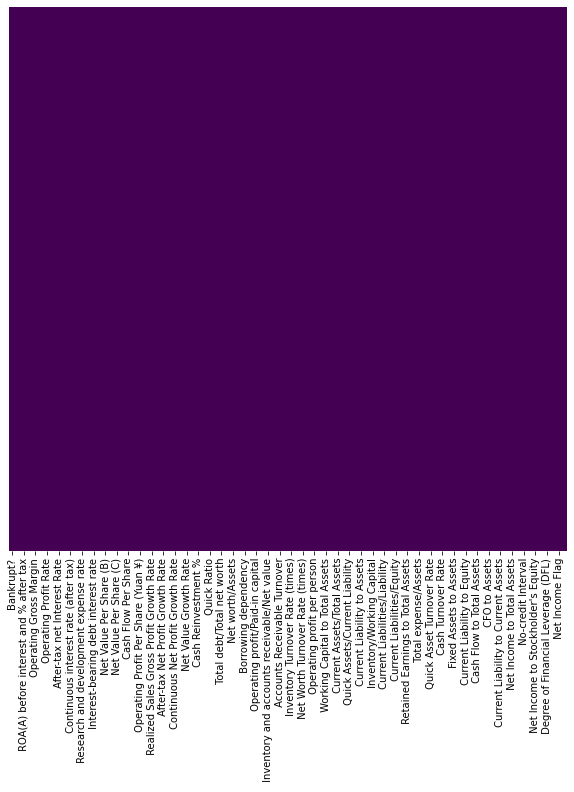

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have no null values in the DataFrame, so we dont need to fill any fields 

In [18]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

We can see that we have an unbalanced sample. Despite of this, we are going to continue the creation of the model to see how well it predicts test data and we will configure corresponding weights that compensates inbalanced data. The only adjustments that we need to do is to remove the **Net Income Flag** column because it doesnt provide much information given that all of the values are equal to 1. 

In [65]:
bankrupt= df.drop(" Net Income Flag", axis=1) 

## Scaling the Variables and Split Data

Firstly, we need to split the data between a training and a test set

In [20]:
from sklearn.model_selection import train_test_split

In [66]:
X=bankrupt.drop("Bankrupt?", axis=1).values
y=bankrupt["Bankrupt?"].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

Most of the columns are continuous variables, with exception of the Net Income Flag. However, we already dropped it because it doesnt give any important information to add for the model

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [68]:
scaler.fit(X_train)

MinMaxScaler()

In [69]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creation of the Model

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

Instead of changing your dataset, another approach to handling imbalanced datasets involves instructing TensorFlow and Keras to take that class imbalance into account. For this, the model.fit function contains a class_weights attribute.

In [70]:
class_zero= bankrupt[bankrupt["Bankrupt?"] == 0]
class_one= bankrupt[bankrupt["Bankrupt?"] == 1]

In [72]:
zero_numpy = class_zero["Bankrupt?"].to_numpy()
one_numpy = class_one["Bankrupt?"].to_numpy()

In [73]:
all_together = np.concatenate((zero_numpy, one_numpy))
unique_classes = np.unique(all_together)

In [90]:
weights = sklearn.utils.class_weight.compute_class_weight('balanced', unique_classes, all_together)
weights = {i : weights[i] for i in range(2)}
print(weights)

{0: 0.5166691923018639, 1: 15.497727272727273}


Effectively, you’re thus telling the training process to keep in mind that some samples come from an underrepresented class.

In [76]:
model = Sequential()
model.add(Dense(units=94,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=47,activation='relu'))
model.add(Dropout(0.5))

# For a binary classification problem
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [79]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          class_weight=weights,
          callbacks=[early_stop]
          )

Epoch 1/600
160/160 [==============================] - 1s 3ms/step - loss: 0.4832 - val_loss: 0.3700
Epoch 2/600
160/160 [==============================] - 0s 3ms/step - loss: 0.4385 - val_loss: 0.5247
Epoch 3/600
160/160 [==============================] - 0s 3ms/step - loss: 0.4111 - val_loss: 0.4376
Epoch 4/600
160/160 [==============================] - 0s 3ms/step - loss: 0.3959 - val_loss: 0.1677
Epoch 5/600
160/160 [==============================] - 0s 3ms/step - loss: 0.4240 - val_loss: 0.2024
Epoch 6/600
160/160 [==============================] - 0s 3ms/step - loss: 0.3979 - val_loss: 0.4451
Epoch 7/600
160/160 [==============================] - 0s 3ms/step - loss: 0.3718 - val_loss: 0.2014
Epoch 8/600
160/160 [==============================] - 0s 3ms/step - loss: 0.3765 - val_loss: 0.2786
Epoch 9/600
160/160 [==============================] - 0s 3ms/step - loss: 0.3716 - val_loss: 0.2101
Epoch 10/600
160/160 [==============================] - 1s 3ms/step - loss: 0.3618 - val_lo

the model stopped at epoch number 29 with a patience of 25. These epoch evaluated the minimum validation loss achieved 

<AxesSubplot:>

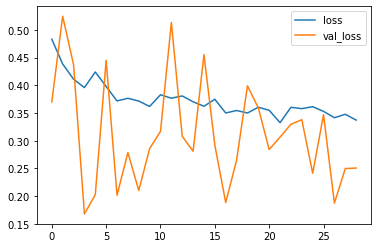

In [92]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [93]:
predictions = model.predict_classes(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1646
           1       0.20      0.69      0.31        59

    accuracy                           0.90      1705
   macro avg       0.60      0.80      0.63      1705
weighted avg       0.96      0.90      0.92      1705



In [96]:
print(confusion_matrix(y_test,predictions))

[[1485  161]
 [  18   41]]


It seems that our model is a robust one!!. Only 179 data predictions were labeled wrong and 1526 right. However, we need to be very cautious of these results because of the inbalanced dataset that we are using. Despite we used weights to represent more the underrepresented category, maybe its not sufficient to solve this problem. Maybe we can under and oversample the dataframe to have equal samples of both categories too. These approaches can be a work for future developments of the model.